#   Unsupervised ML


# Given the ‘credit_card’ dataset, below is the data definition:
1) CUSTID: Identification of Credit Card holder (Categorical)
2) BALANCE: Balance amount left in their account to make purchases
3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4) PURCHASES: Amount of purchases made from account
5) ONEOFFPURCHASES: Maximum purchase amount done in one-go
6) INSTALLMENTSPURCHASES: Amount of purchase done in installment
7) CASHADVANCE: Cash in advance given by the user
8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
13) PURCHASESTRX: Number of purchase transactions made
14) CREDITLIMIT: Limit of Credit Card for user
15) PAYMENTS: Amount of Payment done by user
16) MINIMUM_PAYMENTS: Minimum amount of payments made by user
17) PRCFULLPAYMENT: Percent of full payment paid by user
18) TENURE: Tenure of credit card service for user


# Importing necessary pakages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [3]:
data = pd.read_csv("credit_card.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Types and Dimension of Data

In [4]:
data.info()

print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

we came to know that all the values in the data is numeric

We can see that the dataframe has 18 columns and 8950 observation

# Statistical Summary

In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#  Missing Values Analysis

In [6]:
missing_values = data.isnull().sum()
print(missing_values)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [7]:
# droppig this entire row as it has only one missing value
missing_value_index=data[data['CREDIT_LIMIT'].isnull()].index.to_list()
new_data=data.drop(index=missing_value_index[0])

Text(0.5, 1.0, 'Distplot')

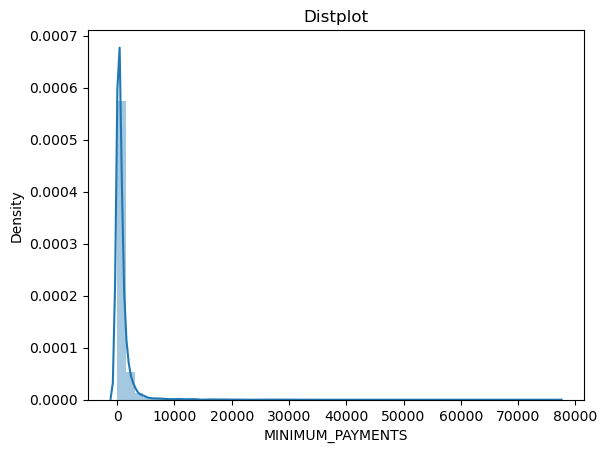

In [8]:
sns.distplot(new_data['MINIMUM_PAYMENTS'])
plt.title("Distplot")

In [9]:
#Replacing missing values with median
new_data.fillna(new_data['MINIMUM_PAYMENTS'].median() , inplace=True)  

# Outlier Treatment using Z-Score


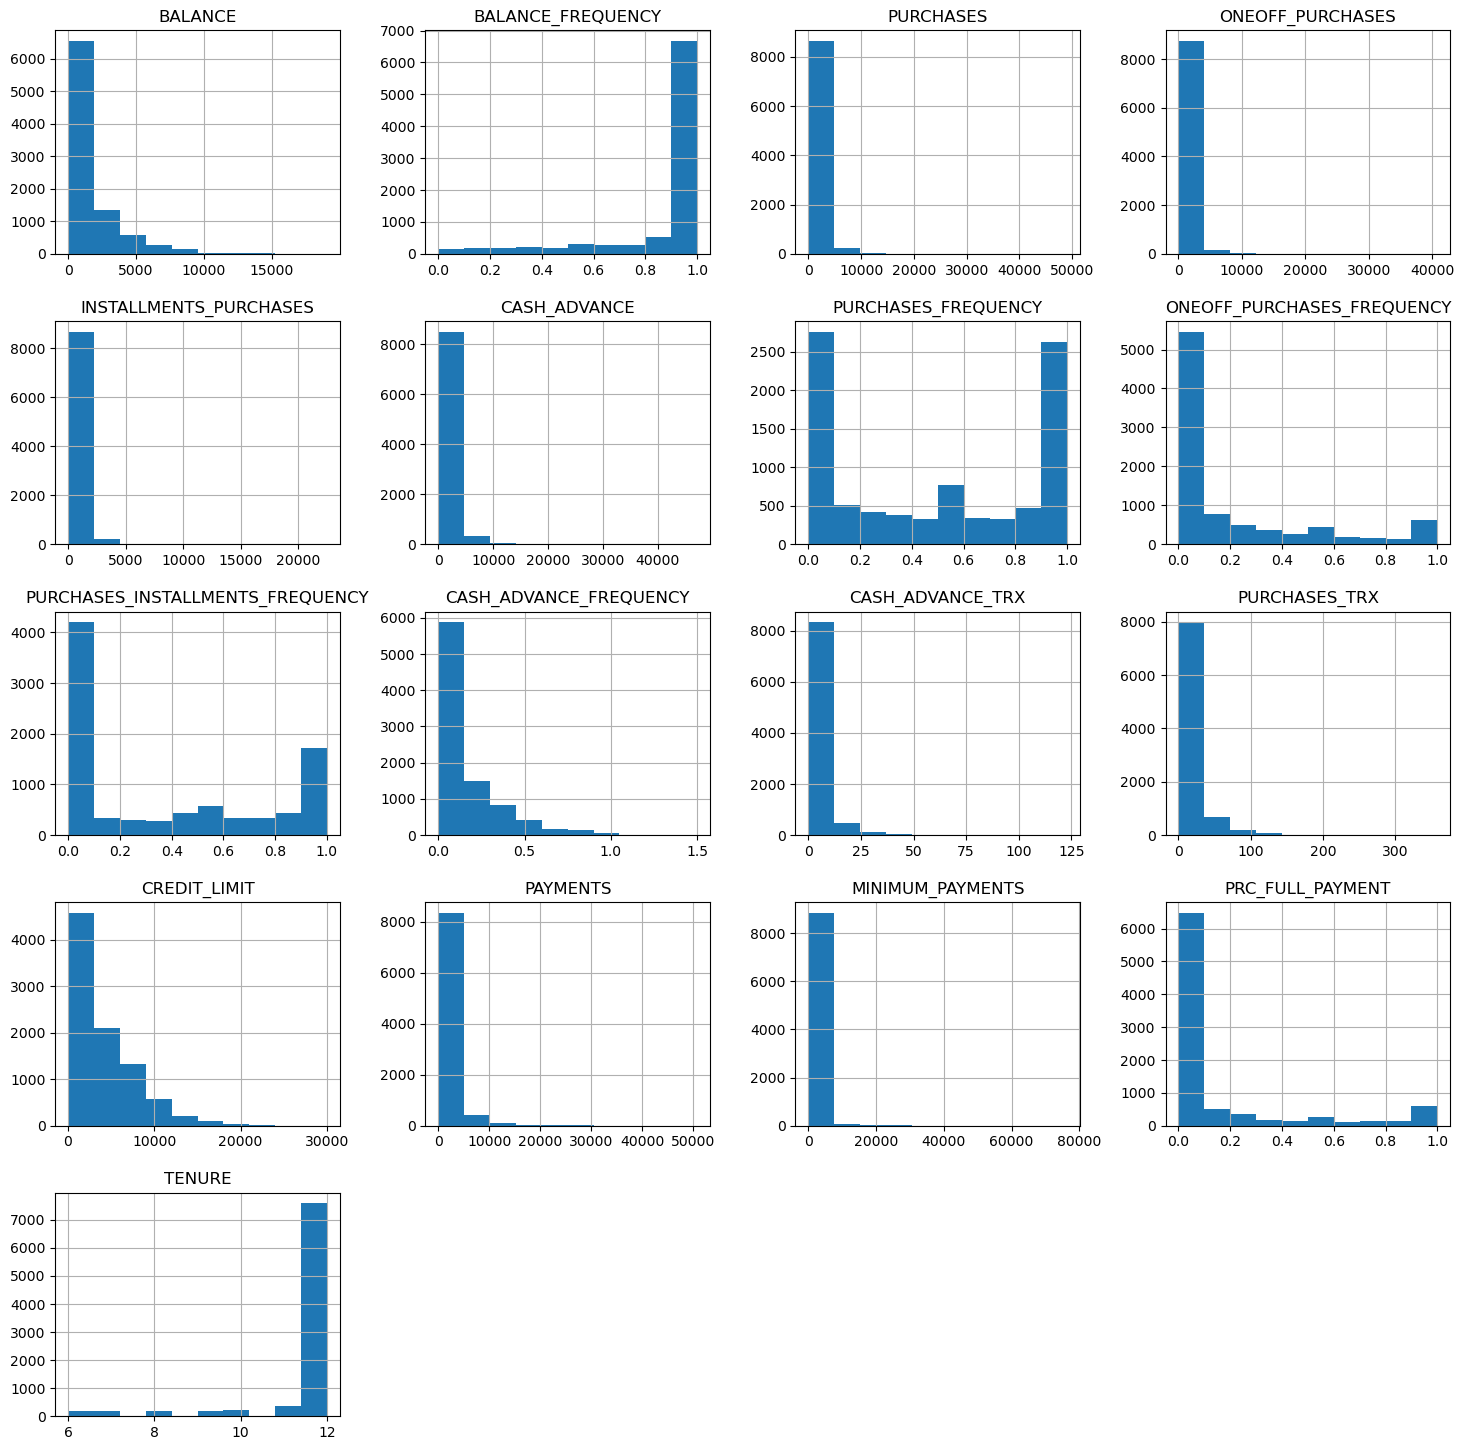

In [10]:
fig = new_data.hist(figsize=(18,18))

In [11]:
from scipy import stats
data1=new_data.drop(columns=['CUST_ID', 'TENURE'])
# calculate z-score

z_score = pd.DataFrame(np.abs(stats.zscore(data1)), columns=data1.columns)
# Find out features with more than 2% outliers (absolute z-score >3)
z_score3=[]
over3_index=[] 
for i in z_score.columns:
    indexs=z_score.index[z_score[i] > 3].tolist()
    ans=i, "{:.3f}".format(len(indexs)/len(z_score)), indexs
    z_score3.append(ans) 
    if len(indexs)/len(z_score) > 0.02:
        over3_index.append(i)  

# removeing 'BALANCE' and 'CASH_ADVANCE' since they are high discriminative features
del over3_index[0]
del over3_index[1]

for i in over3_index:
    data1['sqrt_%s' % i]=data1[i].apply(np.sqrt)

In [12]:
data1 = data1.drop(['BALANCE_FREQUENCY'],axis = 1)
data1 = data1.drop(['CASH_ADVANCE_FREQUENCY'],axis = 1)
data1 = data1.drop(['PURCHASES_TRX'],axis = 1)

# Deal with correlated variables

In [13]:
data_num = data1.copy()
corr = data_num.corr()
corr

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,sqrt_BALANCE_FREQUENCY,sqrt_CASH_ADVANCE_FREQUENCY,sqrt_PURCHASES_TRX
BALANCE,1.000000,0.181230,0.164326,0.126437,0.496679,-0.078054,0.073114,-0.063267,0.385139,0.531283,0.322769,0.397905,-0.319018,0.296834,0.457329,0.057997
PURCHASES,0.181230,1.000000,0.916844,0.679889,-0.051495,0.392991,0.498413,0.315537,-0.067194,0.356963,0.603252,0.095772,0.180356,0.125935,-0.153028,0.633893
ONEOFF_PURCHASES,0.164326,0.916844,1.000000,0.330610,-0.031341,0.264913,0.524881,0.127699,-0.046226,0.319724,0.567283,0.050242,0.132745,0.098616,-0.105225,0.492942
INSTALLMENTS_PURCHASES,0.126437,0.679889,0.330610,1.000000,-0.064264,0.442398,0.214016,0.511334,-0.074017,0.256499,0.384066,0.134003,0.182548,0.116500,-0.168553,0.593134
CASH_ADVANCE,0.496679,-0.051495,-0.031341,-0.064264,1.000000,-0.215579,-0.086786,-0.177118,0.656493,0.303985,0.453226,0.140734,-0.152961,0.099663,0.612824,-0.163972
PURCHASES_FREQUENCY,-0.078054,0.392991,0.264913,0.442398,-0.215579,1.000000,0.501305,0.862921,-0.203541,0.119788,0.103393,0.006105,0.305761,0.206495,-0.398571,0.827310
ONEOFF_PURCHASES_FREQUENCY,0.073114,0.498413,0.524881,0.214016,-0.086786,0.501305,1.000000,0.142270,-0.069116,0.295038,0.243503,-0.027340,0.157497,0.191229,-0.156401,0.633507
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063267,0.315537,0.127699,0.511334,-0.177118,0.862921,0.142270,1.000000,-0.169250,0.060755,0.085496,0.032020,0.250049,0.151881,-0.333949,0.716470
CASH_ADVANCE_TRX,0.385139,-0.067194,-0.046226,-0.074017,0.656493,-0.203541,-0.069116,-0.169250,1.000000,0.149700,0.255262,0.111239,-0.169807,0.135391,0.715855,-0.148120
CREDIT_LIMIT,0.531283,0.356963,0.319724,0.256499,0.303985,0.119788,0.295038,0.060755,0.149700,1.000000,0.421861,0.126750,0.055672,0.091067,0.093574,0.249940


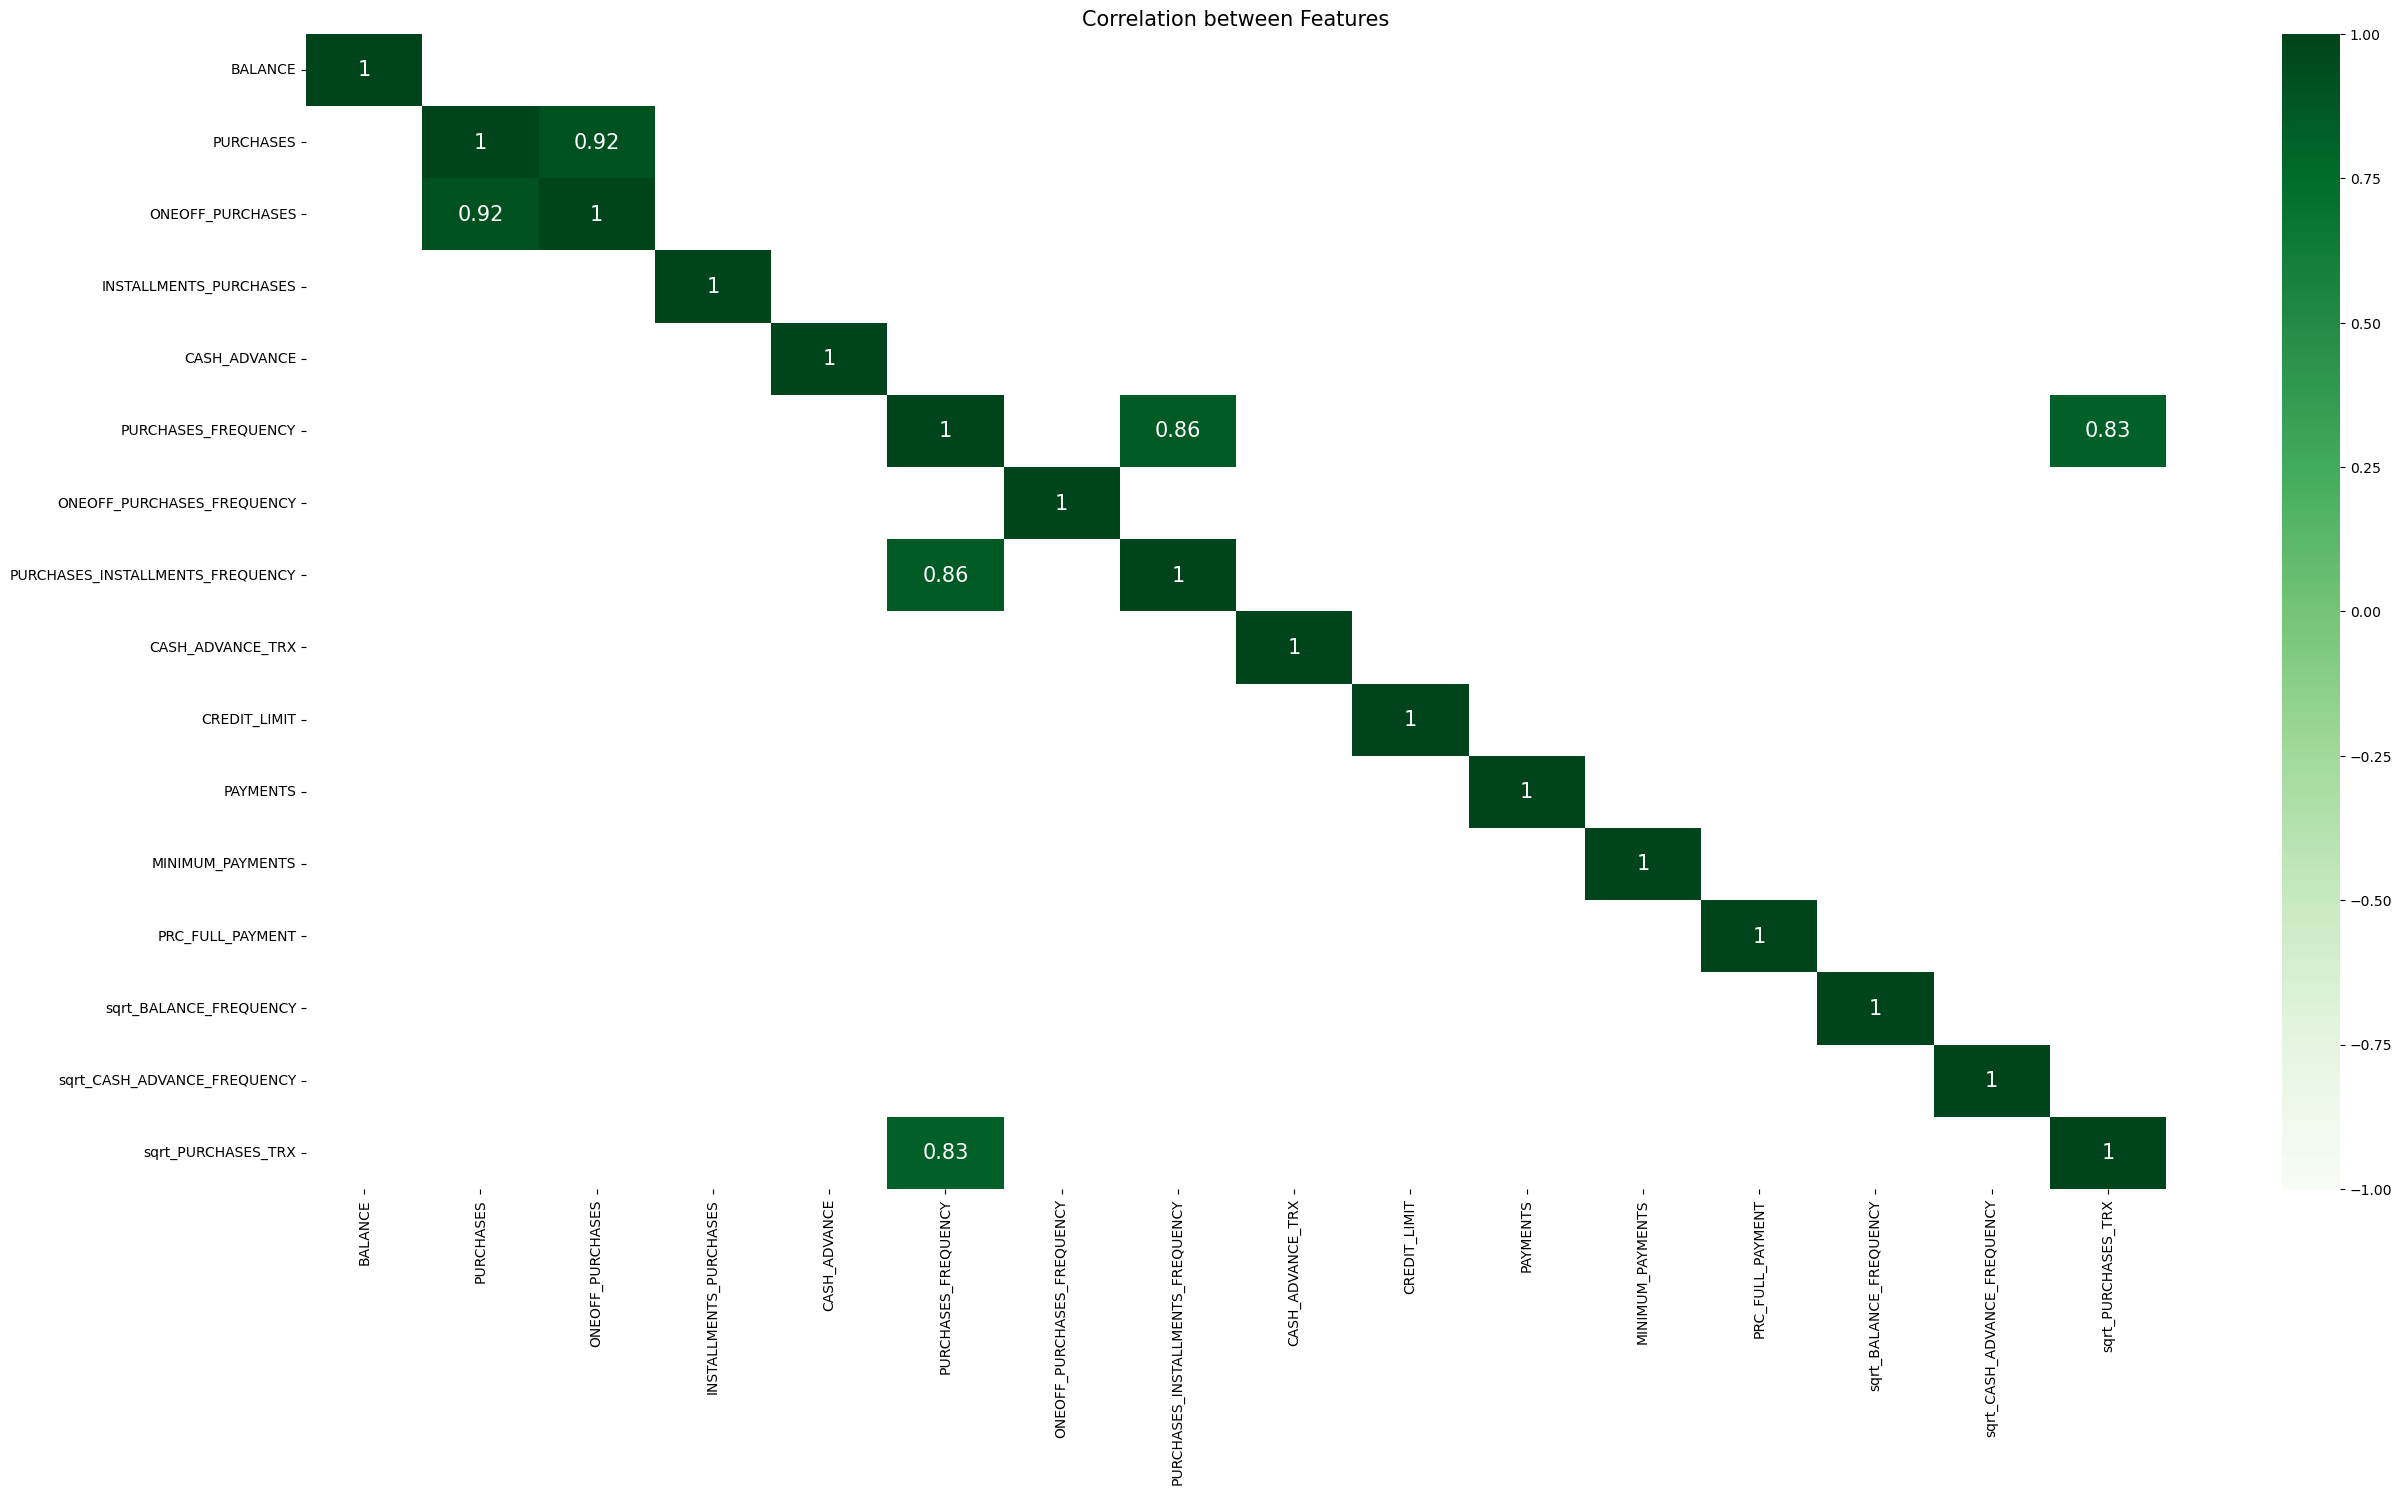

In [14]:
# ploting correlation plot
plt.figure(figsize=(30, 15))

sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)], 
            cmap='Greens', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})          

plt.title('Correlation between Features', fontsize=15)

plt.show()

In [15]:
data1['AVG_ONEOFF_PURCHASES']=data1['ONEOFF_PURCHASES']/data1['ONEOFF_PURCHASES_FREQUENCY']
data1['AVG_ONEOFF_PURCHASES']=data1['AVG_ONEOFF_PURCHASES'].fillna(0)

data1['AVG_INSTALLMENTS_PURCHASES']=data1['INSTALLMENTS_PURCHASES']/data1['PURCHASES_INSTALLMENTS_FREQUENCY']
data1['AVG_INSTALLMENTS_PURCHASES']=data1['AVG_INSTALLMENTS_PURCHASES'].fillna(0)

data1['AVG_CASH_ADVANCE']=data1['CASH_ADVANCE']/data1['CASH_ADVANCE_TRX']
data1['AVG_CASH_ADVANCE']=data1['AVG_CASH_ADVANCE'].fillna(0)

In [16]:
data1.drop(['ONEOFF_PURCHASES'],axis = 1 , inplace = True)
data1.drop(['ONEOFF_PURCHASES_FREQUENCY'],axis = 1, inplace = True)
data1.drop(['INSTALLMENTS_PURCHASES'],axis = 1, inplace = True)
data1.drop(['PURCHASES_INSTALLMENTS_FREQUENCY'],axis = 1, inplace = True)
data1.drop(['CASH_ADVANCE'],axis = 1, inplace = True)
data1.drop(['CASH_ADVANCE_TRX'],axis = 1, inplace = True)

In [17]:
data1.head()

,BALANCE,PURCHASES,PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,sqrt_BALANCE_FREQUENCY,sqrt_CASH_ADVANCE_FREQUENCY,sqrt_PURCHASES_TRX,AVG_ONEOFF_PURCHASES,AVG_INSTALLMENTS_PURCHASES,AVG_CASH_ADVANCE
0,40.900749,95.40,0.166667,1000.0,201.802084,139.509787,0.000000,0.904534,0.000000,1.414214,0.000000,1144.804579,0.000000
1,3202.467416,0.00,0.000000,7000.0,4103.032597,1072.340217,0.222222,0.953463,0.500000,0.000000,0.000000,0.000000,1610.736371
2,2495.148862,773.17,1.000000,7500.0,622.066742,627.284787,0.000000,1.000000,0.000000,3.464102,773.170000,0.000000,0.000000
3,1666.670542,1499.00,0.083333,7500.0,0.000000,312.452292,0.000000,0.797724,0.288675,1.000000,17988.071952,0.000000,205.788017
4,817.714335,16.00,0.083333,1200.0,678.334763,244.791237,0.000000,1.000000,0.000000,1.000000,192.000768,0.000000,0.000000


#  Perform dimensionality reduction using PCA such that the 95% of the variance is explained 

# Dimensionality reduction

In [18]:
x = data1.copy()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [20]:
X = scaler.fit_transform(x)

In [21]:
from sklearn.decomposition import PCA

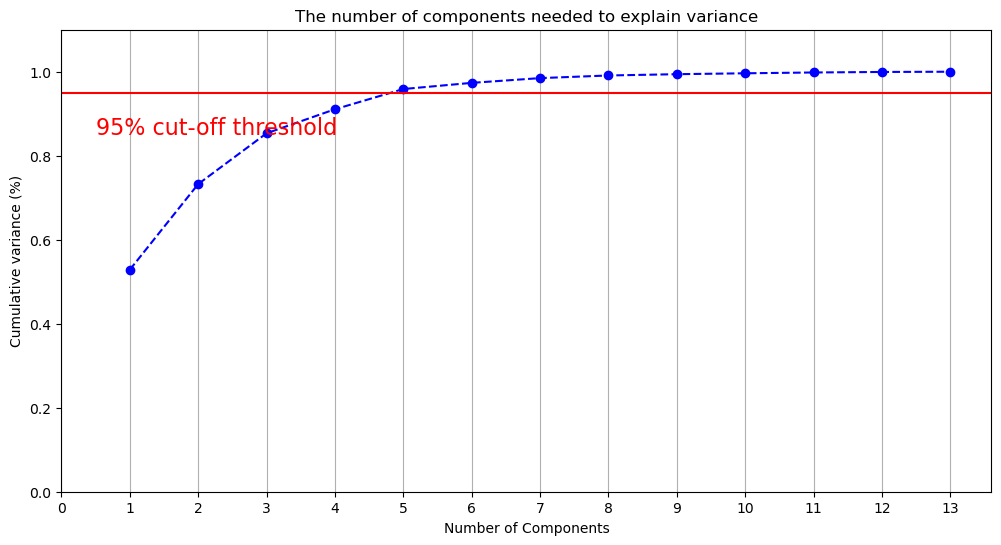

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [23]:
pca = PCA(n_components=5, random_state=42) 

PrincipalComponents = pca.fit_transform(X)

In [24]:
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC' + str(i) for i in range(1,6)])


PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.298222,0.075864,-0.278220,-0.144586,-0.013472
1,-0.495901,0.172514,0.219838,-0.012122,0.092256
2,0.452637,-0.300597,-0.134927,-0.036595,0.078779
3,-0.440707,0.044560,-0.085137,0.073411,0.121372
4,-0.371593,0.078913,-0.233560,-0.238857,0.025877


#  Finding the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve 

# Clustering Algorithms - KMeans


In [25]:
df_Kmeans = PCA_df.copy()


In [26]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

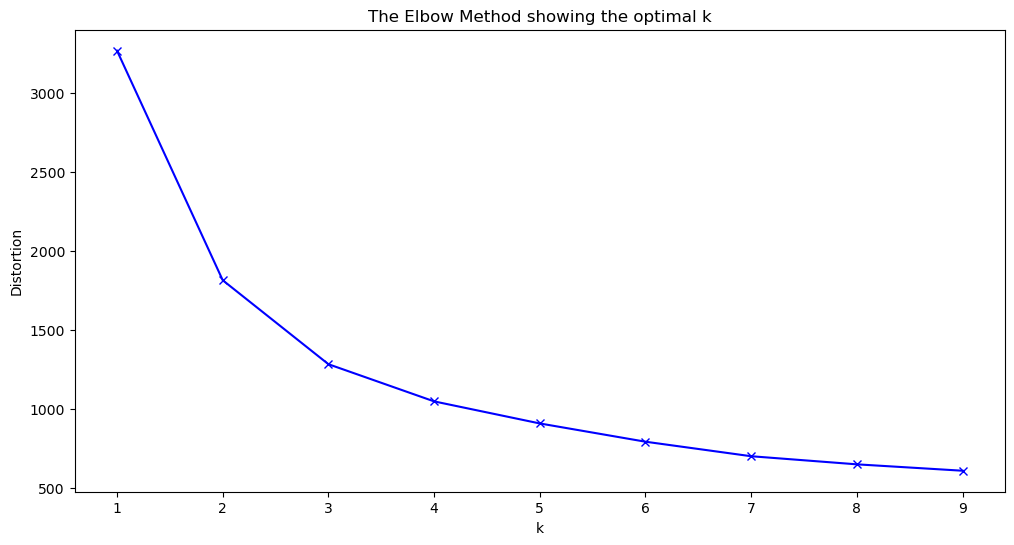

In [27]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(PrincipalComponents)
    #distortions.append(sum(np.min(cdist(PrincipalComponents, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / PrincipalComponents.shape[0])
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

By using Elbow method we found k = 3 as the number of clusters

# Silhouette Test

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
n_clusters = [2,3,4, 5,6,7,8]

for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(PrincipalComponents)
    
    score = silhouette_score(PrincipalComponents, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.41077630792717884)
For n_clusters = 3, silhouette score is 0.43211510327075925)
For n_clusters = 4, silhouette score is 0.3801786886179325)
For n_clusters = 5, silhouette score is 0.3586214714749333)
For n_clusters = 6, silhouette score is 0.3704398462272011)
For n_clusters = 7, silhouette score is 0.3757525419848465)
For n_clusters = 8, silhouette score is 0.33260761019227786)


# Building the model

In [30]:
Kmodel = KMeans(n_clusters= 3, random_state= 10)    #we got k=3 in previous step

# fit the model
Kmodel.fit(PrincipalComponents)

KMeans(n_clusters=3, random_state=10)

In [31]:
df_Kmeans['Cluster'] = Kmodel.fit_predict(PrincipalComponents)

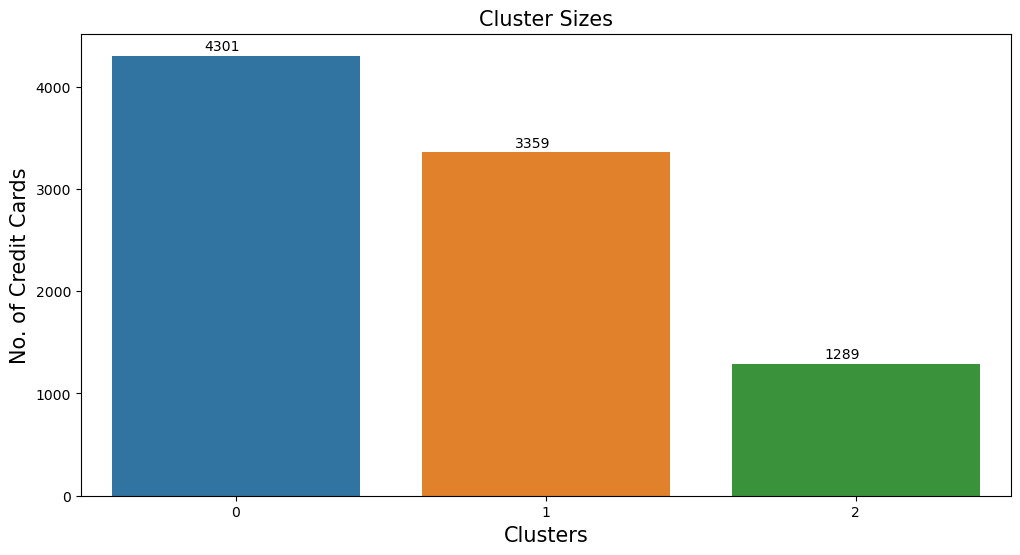

In [32]:
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

cl1 = np.unique(Kmodel.labels_, return_counts=True)[1][0] + 50
cl2 = np.unique(Kmodel.labels_, return_counts=True)[1][1] + 50
cl3 = np.unique(Kmodel.labels_, return_counts=True)[1][2] + 50

plt.text(x = -0.1, y =cl1, s = np.unique(Kmodel.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =cl2, s = np.unique(Kmodel.labels_, return_counts=True)[1][1])
plt.text(x = 1.90, y =cl3, s = np.unique(Kmodel.labels_, return_counts=True)[1][2])

plt.show()

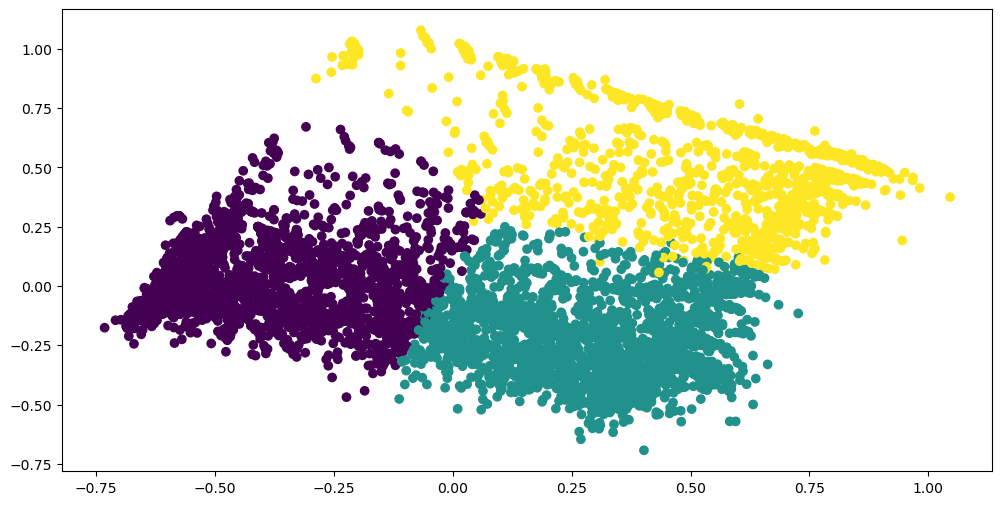

In [33]:
plt.scatter(df_Kmeans['PC1'],df_Kmeans['PC2'],c= df_Kmeans['Cluster'])

# Conclusion

K=3 is the optimum number of clusters that should be formed

In [34]:
data1['Cluster'] = df_Kmeans['Cluster']

In [35]:
centers = pd.DataFrame(Kmodel.cluster_centers_, columns=  df_Kmeans.columns[0:5])      

In [36]:
centers

,PC1,PC2,PC3,PC4,PC5
0,-0.414541,0.030161,-0.008963,-0.010101,0.008523
1,0.321775,-0.225587,-0.044249,0.017923,-0.012357
2,0.543941,0.486864,0.145096,-0.012999,0.003766
